In [63]:
from sklearn import linear_model
from scipy.special import expit
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from math import exp
from math import log

In [7]:
iris = datasets.load_iris()
iris_data = iris.data
# Here we are splitting the iris data into the predictors and response variables
iris_target = iris.target

We will be using two variants of the Iris dataset for out logistic regression and Predict each datapoints to see under which of those two species they will fall

In [8]:
# We will only select two species data 0-setosa and 1-versicolor
iris_target = iris_target[0:100]

Text(0, 0.5, 'Sepal Width')

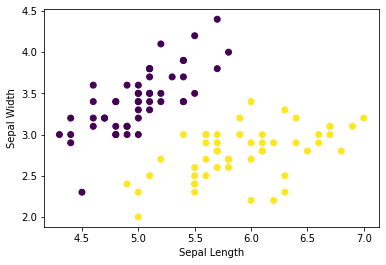

In [11]:
# let's plot the data to see how the species are with respect to only sepal data
plt.scatter(iris_data[:,0],iris_data[:,1], c=iris_target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")


Text(0, 0.5, 'Species')

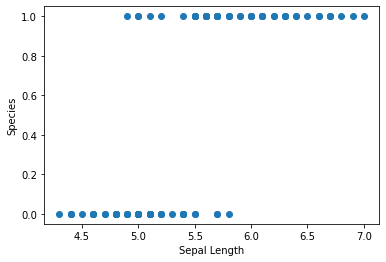

In [14]:
# For simplicity lets only use Sepal Length to predict the species.
plt.scatter(iris_data[:,0], iris_target)
plt.xlabel('Sepal Length')
plt.ylabel('Species')

We have simplified the problem in such a way that we can use Logisitc regression to predict the kind of species. We know that Logistic regression is useful in predicting the binary outcomes and in our case if the outcome is 0 then we can classify the species as Setosa or if the outcome is 1 then we can term is as versi-color

In [16]:
# Let us use the Logistic regression to predict the species
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:,0].reshape(-1,1), iris_target)

LogisticRegression(C=100000.0)

In [20]:
# The sepal length ranges betwe 4 and 7 
x_test = np.linspace(4.0,7.0,100)
# predict dummy y_test data based on the logistic model
y_test = x_test * model.coef_ + model.intercept_

Text(0, 0.5, 'Species')

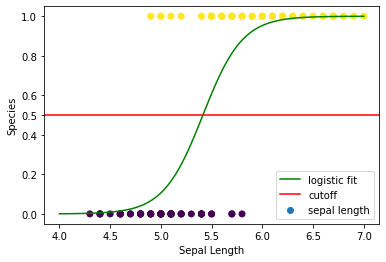

In [42]:
# Let us plot the Logistic model.
sigmoid = expit(y_test)
plt.scatter(iris_data[:,0],iris_target, c=iris_target,label = "sepal length")
 
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")
plt.xlabel('Sepal Length')
plt.ylabel('Species')


The above plot is the Probability plot for the expected Species outcome vs the Sepal Length. As we see here the the relation between the Predictor and the Response is not a linear curve. Instead it is a sigmoid curve. Hence we can say that the Logistic regression can be used to address the non linear relationship

Below is the plot of the Log odds of the logistic regression that has been derived above. If we see below at the plot we could see a linear relationship between the Log odds and the Predictor variable.
Log odds of a logistic regression is a linear equatiion. 

Text(0, 0.5, 'Log Odds')

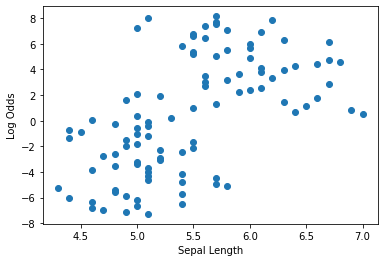

In [59]:
plt.scatter(iris_data[:,0].reshape(-1,1), np.reshape(y_test, (100, 1)))
plt.xlabel('Sepal Length')
plt.ylabel('Log Odds')